<a href="https://colab.research.google.com/github/smmurdock/Neural-Network-Seedling-Images/blob/main/D604_Task_1_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
cd /content/drive/MyDrive/1 Projects/_WGU | MS-DataAnalytics-DataScience/WGU | D604 - ADVANCED ANALYTICS/Task 1 - Neural Networks/images

/content/drive/MyDrive/1 Projects/_WGU | MS-DataAnalytics-DataScience/WGU | D604 - ADVANCED ANALYTICS/Task 1 - Neural Networks/images


## A. Scenario Selection

## B. Image Dataset

### B1. Exploratory Data Analysis (EDA)

In [23]:
# Import libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [12]:
# Set the environment for reproducibility
np.random.seed(6)

**Load the Dataset**

The dataset consists of two files:
- `images.npy`: Contains 4,750 RBG images in numpy array format
- `labels.csv`: Contains the corresponding labels for each image

In [13]:
# Load the data
images = np.load('images.npy')
labels = pd.read_csv('labels.csv')

#### B1a. Data Visualization

In this section, we perform exploratory data analysis on the plant seedling
dataset to understand the distribution of images across the 12 different
plant species classes. This analysis helps us identify any potential class
imbalance issues that may need to be addressed during model training.

In [14]:
# Display basic information
print("Dataset Overview:")
print("=" * 60)
print(f"Images shape: {images.shape}")
print(f"Labels shape: {labels.shape}")
print(f"\nColumn name(s): {labels.columns.tolist()}")
print(f"\nFirst 10 labels:")
print(labels.head(5))

Dataset Overview:
Images shape: (4750, 128, 128, 3)
Labels shape: (4750, 1)

Column name(s): ['Label']

First 10 labels:
                       Label
0  Small-flowered Cranesbill
1  Small-flowered Cranesbill
2  Small-flowered Cranesbill
3  Small-flowered Cranesbill
4  Small-flowered Cranesbill


**Class Distribution Analysis**

We analyze the distribution of images across all 12 plant species to understand whether the dataset is balanced or if certain classes are over/under-represented.

In [15]:
# Get value counts for each class
class_distribution = labels.iloc[:, 0].value_counts()

print("Class Distribution Summary:")
print("=" * 60)
print(class_distribution)
print("\n" + "=" * 60)
print(f"Total images: {class_distribution.sum()}")
print(f"Number of classes: {len(class_distribution)}")
print(f"Mean images per class: {class_distribution.mean():.2f}")
print(f"Standard deviation: {class_distribution.std():.2f}")
print(f"Min: {class_distribution.min()} | Max: {class_distribution.max()}")

Class Distribution Summary:
Label
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: count, dtype: int64

Total images: 4750
Number of classes: 12
Mean images per class: 395.83
Standard deviation: 154.22
Min: 221 | Max: 654


**Class Balance Analysis:**

To assess whether the dataset has class imbalance issues, we calculate the balance ratio (minimum class count / maximum class count). A ratio closer to 1.0 indicates better balance.

In [22]:
# Balance Analysis
# Calculate balance metrics
balance_ratio = class_distribution.min() / class_distribution.max()

print("Class Balance Analysis:")
print("=" * 60)
print(f"Balance ratio (min/max): {balance_ratio:.3f}")
print(f"Range (max - min): {class_distribution.max() - class_distribution.min()}")

# Provide interpretation
if balance_ratio > 0.8:
    balance_status = "Well-balanced"
    recommendation = "No special handling required"
elif balance_ratio > 0.5:
    balance_status = "Moderately imbalanced"
    recommendation = "Consider class weights or augmentation"
else:
    balance_status = "Significantly imbalanced"
    recommendation = "Strongly recommend class weights and targeted augmentation"

print(f"\nStatus: {balance_status}")
print(f"Recommendation: {recommendation}")
print("=" * 60)

Class Balance Analysis:
Balance ratio (min/max): 0.338
Range (max - min): 433

Status: Significantly imbalanced
Recommendation: Strongly recommend class weights and targeted augmentation


**Visualization: Class Distribution Bar Chart**

The following bar chart visualizes the number of images in each of the 12 plant species categories. The red dashed line represents the mean number of images per class.

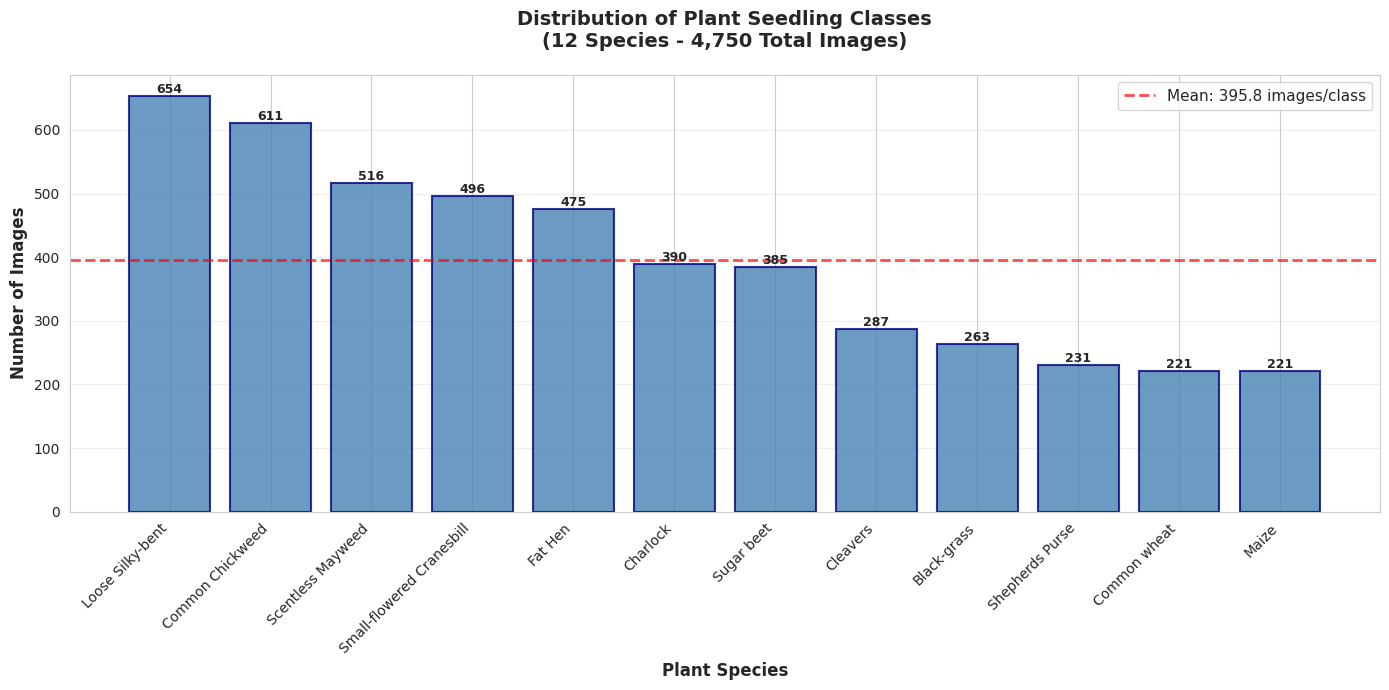

In [21]:
# Create the bar chart
fig, ax = plt.subplots(figsize=(14, 7))

# Create bars
bars = ax.bar(range(len(class_distribution)),
               class_distribution.values,
               color='steelblue',
               edgecolor='navy',
               alpha=0.8,
               linewidth=1.5)

# Customize the plot
ax.set_xlabel('Plant Species', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Images', fontsize=12, fontweight='bold')
ax.set_title('Distribution of Plant Seedling Classes\n(12 Species - 4,750 Total Images)',
             fontsize=14, fontweight='bold', pad=20)

# Set x-axis labels
ax.set_xticks(range(len(class_distribution)))
ax.set_xticklabels(class_distribution.index, rotation=45, ha='right', fontsize=10)

# Add value labels on bars
for bar, value in zip(bars, class_distribution.values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(value)}',
            ha='center', va='bottom', fontsize=9, fontweight='bold')

# Add mean line
mean_value = class_distribution.mean()
ax.axhline(y=mean_value, color='red', linestyle='--', linewidth=2,
           label=f'Mean: {mean_value:.1f} images/class', alpha=0.7)
ax.legend(loc='upper right', fontsize=11)

# Grid
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

**Key Findings:**

Based on the class distribution analysis:

* The dataset containts 4,750 images across 12 plant species.
* The average number of images per class is 395.8.
* Class balance ratio: 0.338

**Implications for Model Training:**

We will need to augment the data to fix the class balance ratio as part of our preprocessing to be ready for training a neural network.

#### B1b. Sample Images

To better understand the visual characteristics of each plant species in our dataset, we display sample images from each of the 12 classes. This visualization helps identify visual patterns, image quality, and potential issues in classification.

In [24]:
# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

In [26]:
# Get unique classes
unique_classes = labels['Label'].unique()
n_classes = len(unique_classes)

print(f"Displaying sample images from {n_classes} plant species classes:")
print(f"Total images in dataset: {len(images)}")

Displaying sample images from 12 plant species classes:
Total images in dataset: 4750


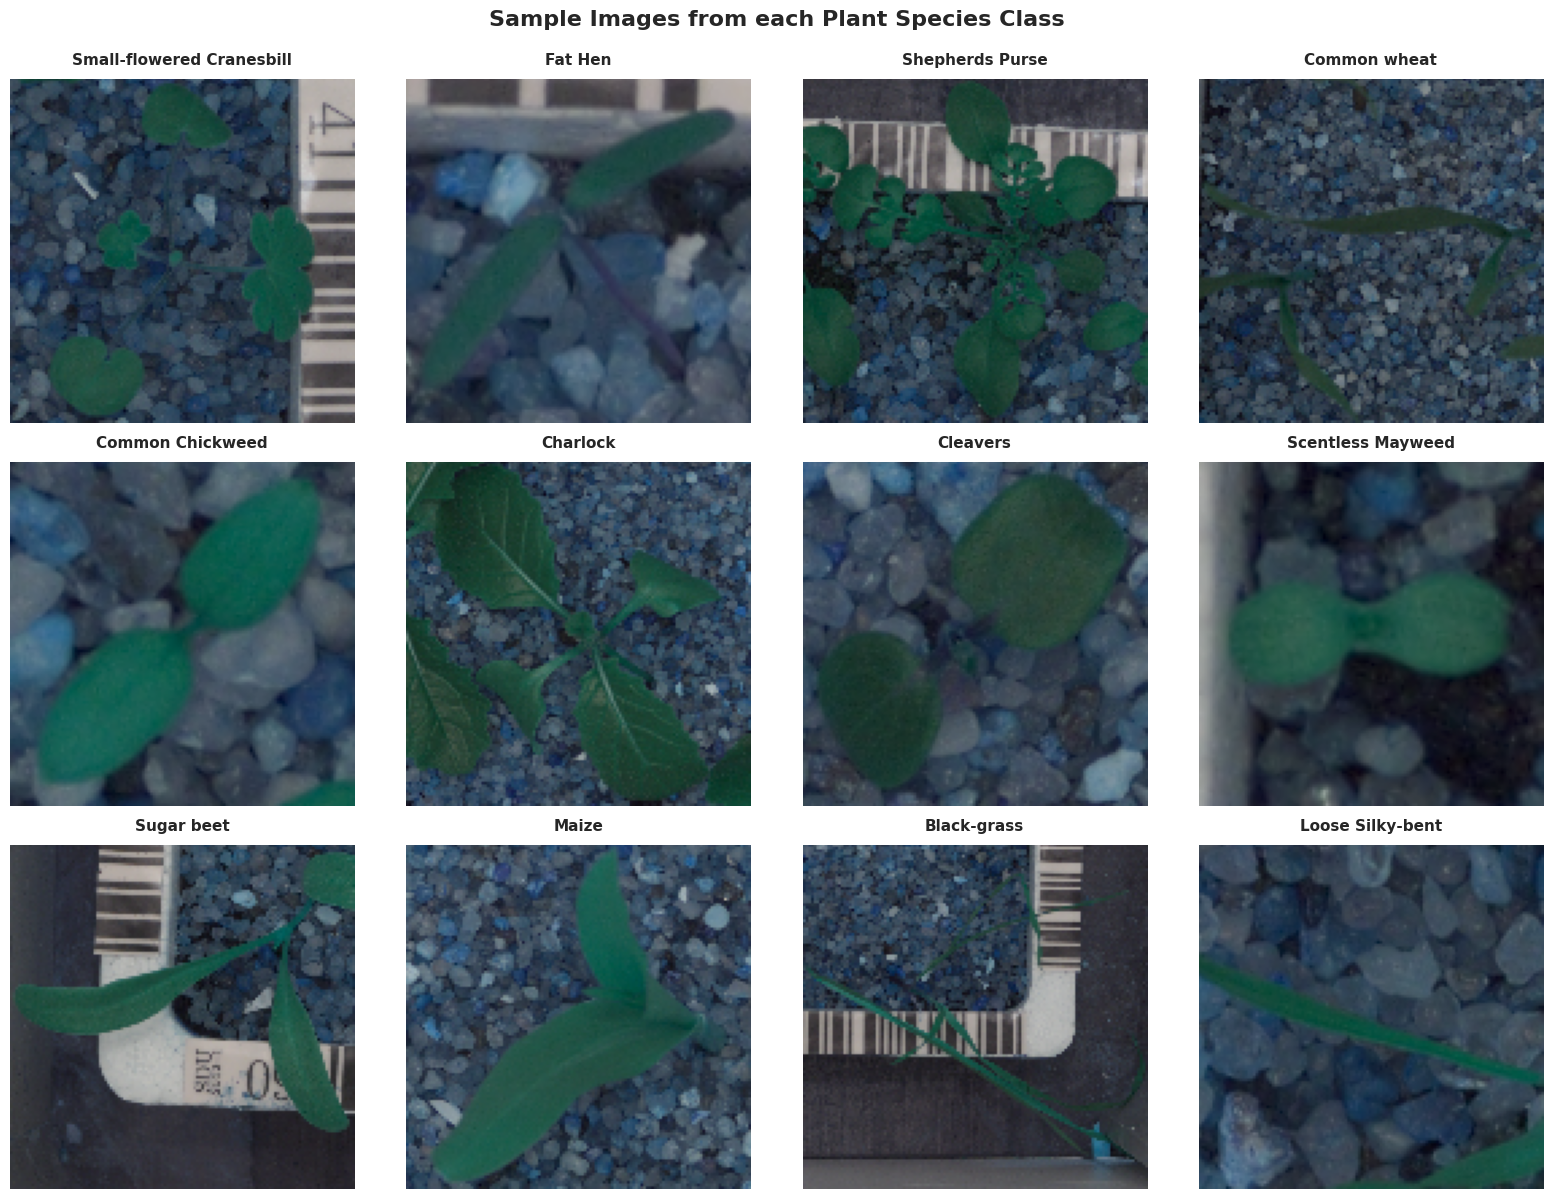

In [28]:
# Create a figure to display sample images
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
fig.suptitle('Sample Images from each Plant Species Class', fontsize=16,
             fontweight='bold', y=0.995)

# Flatten aces for easier iteration
axes = axes.flatten()

# Iterate through each class
for idx, class_name in enumerate(unique_classes):
    # Get indices for this class
    class_indices = labels[labels['Label'] == class_name].index.tolist()

    # Randomly select one image from this class
    sample_idx = random.choice(class_indices)
    sample_image = images[sample_idx]

    # Display the image
    axes[idx].imshow(sample_image)
    axes[idx].set_title(f'{class_name}', fontsize=11, fontweight='bold',
                        pad=10)
    axes[idx].axis('off')

    # Add a colored border around each image
    for spine in axes[idx].spines.values():
        spine.set_edgecolor('gray')
        spine.set_linewidth(2)

plt.tight_layout()
plt.show()